# Analyse zur Verteilung der Erstellungsdaten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 10000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200000)     # zeigt Zeileninfo, wenn nötig

# Pfad zur Datei
path = Path("dataset/311_Service_Requests_2024.csv")
df = pd.read_csv(path)

In [3]:
# Modus Berechnung
mode_hour = df["CREATED_HOUR"].mode()[0]
mode_weekday = df["CREATED_DAY_OF_WEEK"].mode()[0]
mode_month = df["CREATED_MONTH"].mode()[0]

# von Montag bis Sonntag
weekday_order = [2, 3, 4, 5, 6, 7, 1] 

# Mappings für lesbare Namen
weekday_names = {
    1: "Sonntag",
    2: "Montag",
    3: "Dienstag",
    4: "Mittwoch",
    5: "Donnerstag",
    6: "Freitag",
    7: "Samstag"
}

month_names = {
    1: "Januar",  2: "Februar", 3: "März",
    4: "April",   5: "Mai",     6: "Juni",
    7: "Juli",    8: "August",  9: "September",
    10: "Oktober", 11: "November", 12: "Dezember"
}

# Output der Moden
print(f"Modus Stunde: {mode_hour}:00 Uhr")
print(f"Modus Wochentag: {weekday_names.get(mode_weekday, mode_weekday)}")
print(f"Modus Monat: {month_names.get(mode_month, mode_month)}")


Modus Stunde: 14:00 Uhr
Modus Wochentag: Dienstag
Modus Monat: Juli


In [12]:
median_hour = df["CREATED_HOUR"].median()
median_weekday = df["CREATED_DAY_OF_WEEK"].median()
median_month = df["CREATED_MONTH"].median()

print(f"Median Stunde: {median_hour:.2f}:00 Uhr")
print(f"Median Wochentag: {weekday_names.get(median_weekday, median_weekday)}")
print(f"Median Monat: {month_names.get(median_month, median_month)}")

Median Stunde: 13.00:00 Uhr
Median Wochentag: Mittwoch
Median Monat: Juni


In [13]:
iqr_hour = df["CREATED_HOUR"].quantile(0.75) - df["CREATED_HOUR"].quantile(0.25)
iqr_weekday = df["CREATED_DAY_OF_WEEK"].quantile(0.75) - df["CREATED_DAY_OF_WEEK"].quantile(0.25)
iqr_month = df["CREATED_MONTH"].quantile(0.75) - df["CREATED_MONTH"].quantile(0.25)

print(f"IQR Stunde: {iqr_hour}")
print(f"IQR Wochentag: {iqr_weekday}")
print(f"IQR Monat: {iqr_month}")

IQR Stunde: 8.0
IQR Wochentag: 3.0
IQR Monat: 5.0


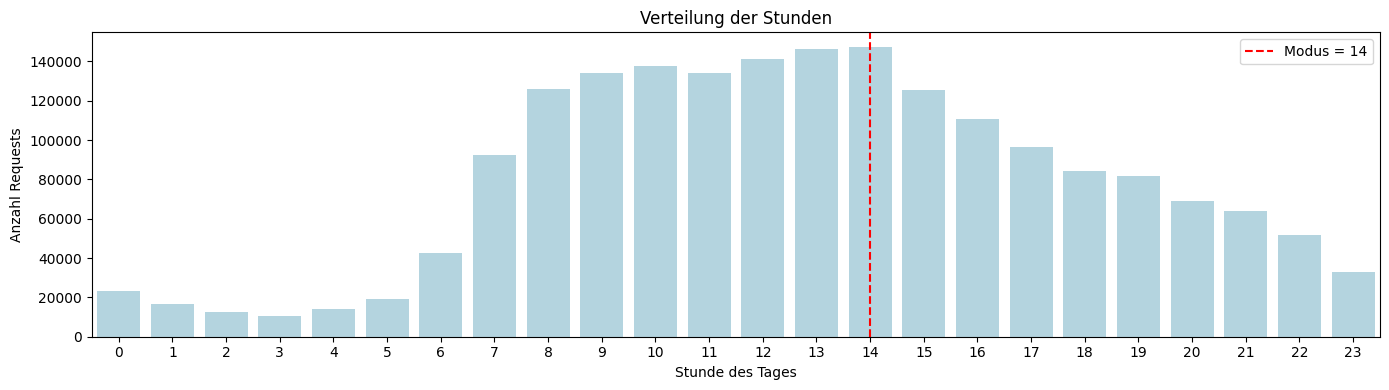

In [4]:
plt.figure(figsize=(14,4))
sns.countplot(x="CREATED_HOUR", data=df, color="lightblue")
plt.title("Verteilung der Stunden")
plt.xlabel("Stunde des Tages")
plt.ylabel("Anzahl Requests")
plt.axvline(mode_hour, color='red', linestyle='--', label=f"Modus = {mode_hour}")
plt.legend()
plt.tight_layout()
plt.show()

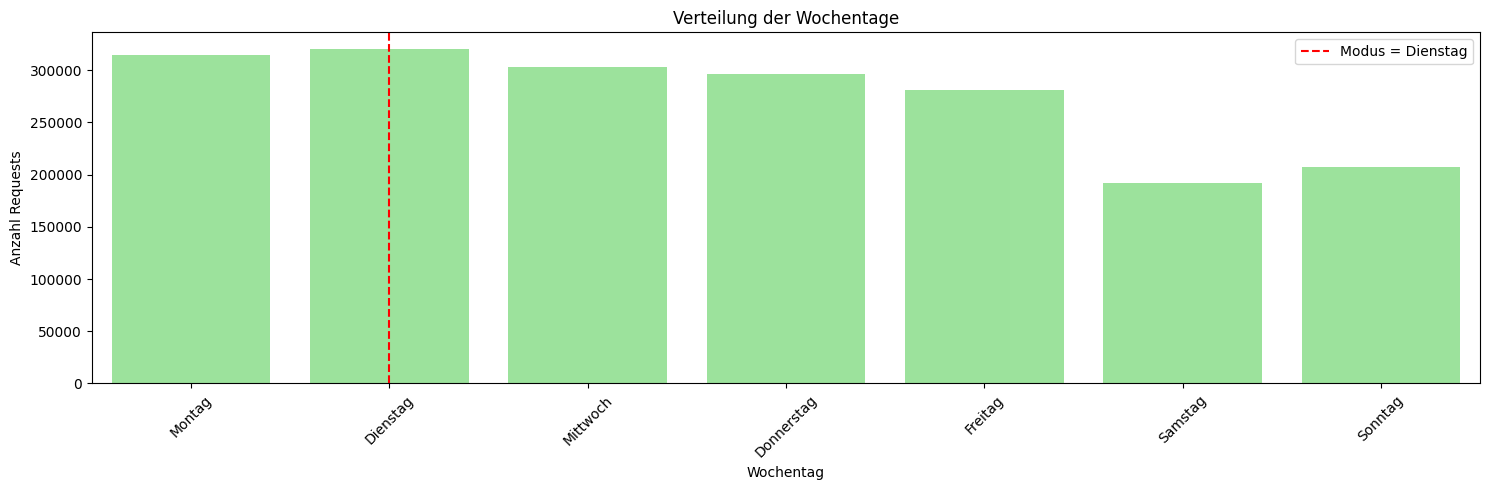

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x="CREATED_DAY_OF_WEEK", data=df, order=weekday_order, color="lightgreen")
plt.title("Verteilung der Wochentage")
plt.xlabel("Wochentag")
plt.ylabel("Anzahl Requests")
plt.xticks( ticks=range(len(weekday_order)), labels=[weekday_names[i] for i in weekday_order], rotation=45)
plt.axvline(x=[2,3,4,5,6,7,1].index(mode_weekday), color='red', linestyle='--', label=f"Modus = {weekday_names.get(mode_weekday)}")
plt.legend()
plt.tight_layout()
plt.show()

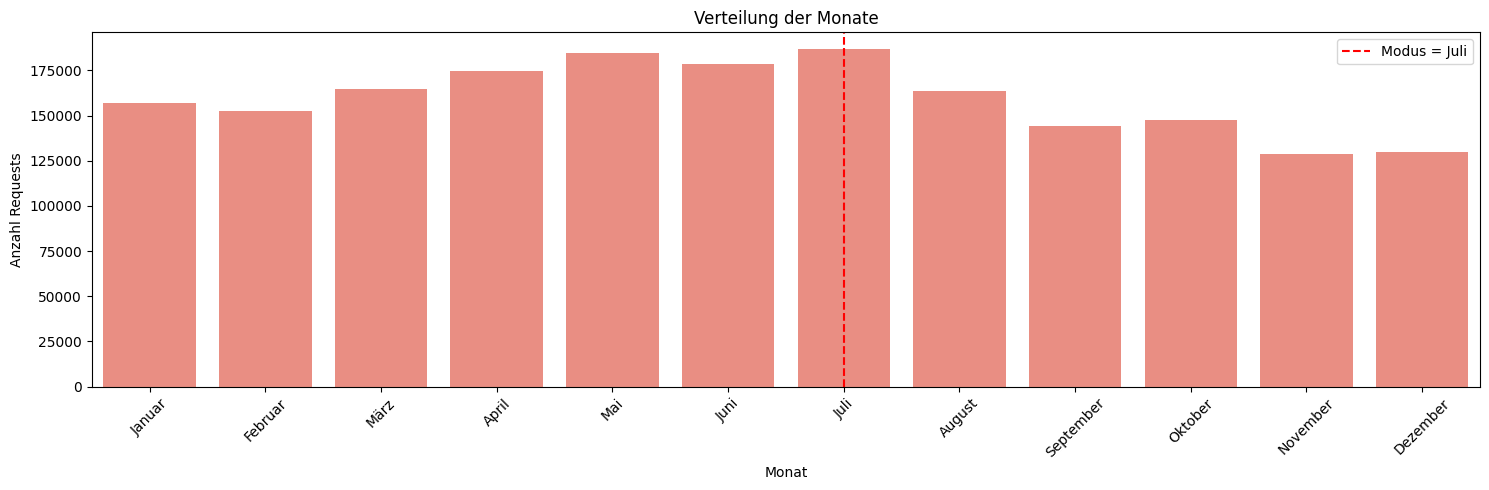

In [21]:
# Monat
plt.figure(figsize=(15, 5))
sns.countplot(x="CREATED_MONTH", data=df, color="salmon")
plt.title("Verteilung der Monate")
plt.xlabel("Monat")
plt.ylabel("Anzahl Requests")
plt.xticks(ticks=range(12), labels=[month_names[i] for i in range(1, 13)], rotation=45)
plt.axvline(x=mode_month - 1, color='red', linestyle='--', label=f"Modus = {month_names[mode_month]}")
plt.legend()
plt.tight_layout()
plt.show()

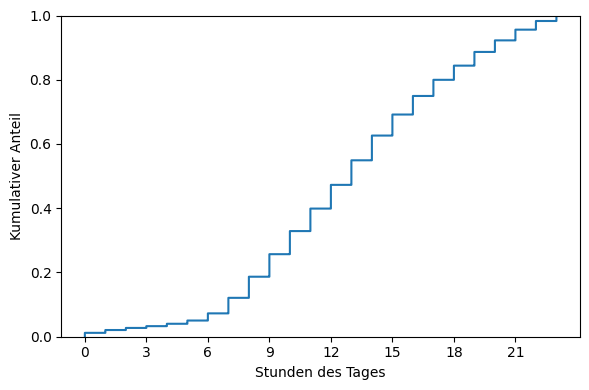

In [33]:
#ECDF um die Verteilung über den Tag richtig sehen zu können
plt.figure(figsize=(6, 4))

sns.ecdfplot(df['CREATED_HOUR'].dropna())

plt.xticks(range(0, 24, 3))
plt.xlabel('Stunden des Tages')
plt.ylabel('Kumulativer Anteil')
plt.tight_layout()
plt.show()


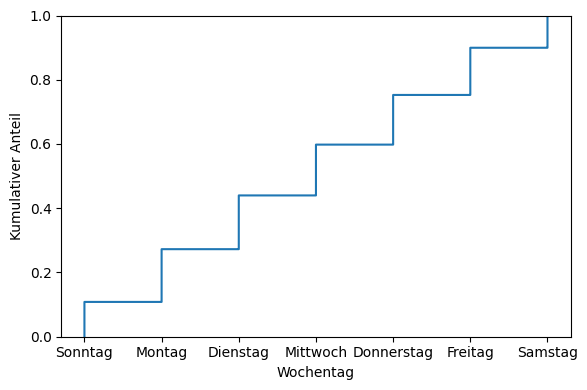

In [25]:
#ECDF für die Verteilung über die Wochentage
plt.figure(figsize=(6, 4))

sns.ecdfplot(df['CREATED_DAY_OF_WEEK'].dropna())

plt.xticks(ticks=weekday_order, labels=[weekday_names[i] for i in weekday_order])
plt.xlabel('Wochentag')
plt.ylabel('Kumulativer Anteil')
plt.tight_layout()
plt.show()

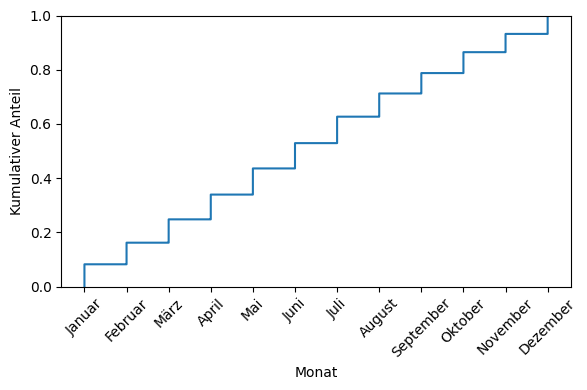

In [24]:
#ECDF für die Verteilung über die Monate
plt.figure(figsize=(6, 4))

sns.ecdfplot(df['CREATED_MONTH'].dropna())

plt.xticks(ticks=sorted(month_names.keys()), labels=[month_names[i] for i in sorted(month_names.keys())], rotation=45)
plt.xlabel('Monat')
plt.ylabel('Kumulativer Anteil')
plt.tight_layout()
plt.show()

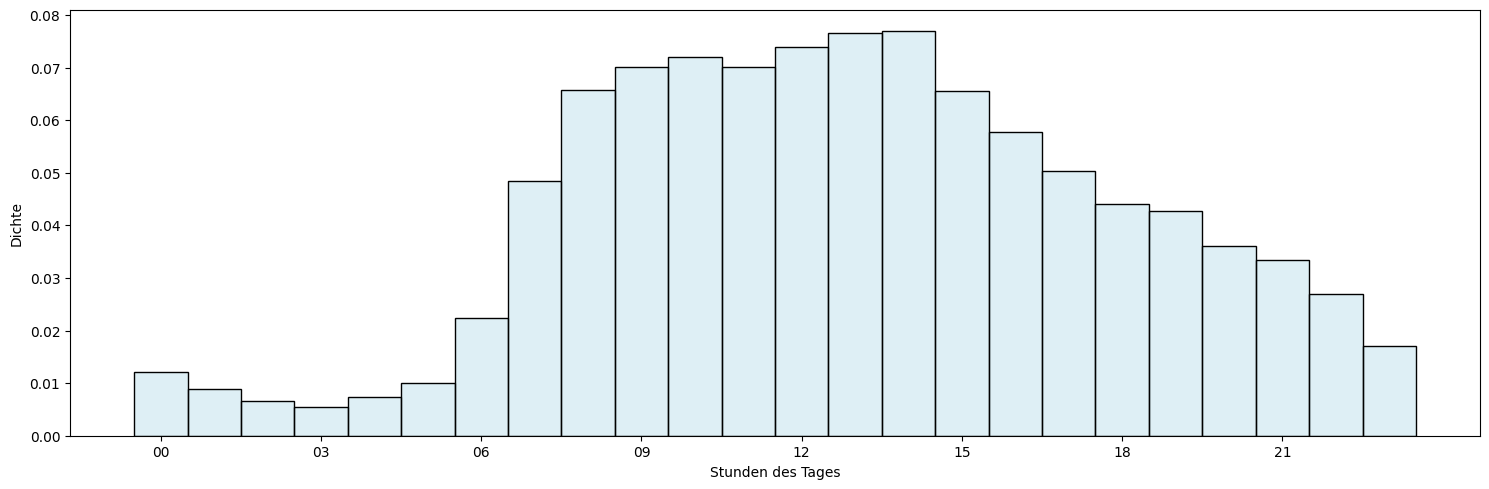

In [34]:
plt.figure(figsize=(15, 5))

sns.histplot(df['CREATED_HOUR'], bins=range(0,25), stat='density', discrete=True, color='lightblue', alpha=0.4)

plt.xlabel('Stunden des Tages')
plt.ylabel('Dichte')
plt.xticks(range(0, 24, 3), [f'{h:02d}' for h in range(0, 24, 3)])
plt.tight_layout()
plt.show()

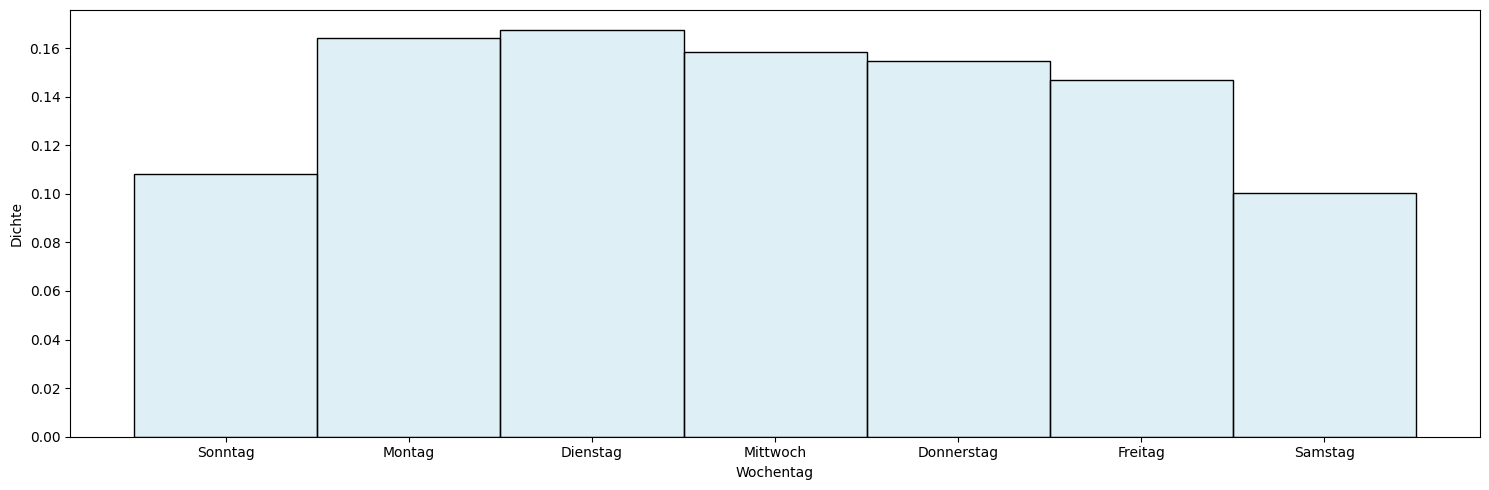

In [35]:
plt.figure(figsize=(15, 5))

sns.histplot(df['CREATED_DAY_OF_WEEK'], bins=range(1,9), stat='density', discrete=True, color='lightblue', alpha=0.4)

plt.xlabel('Wochentag')
plt.ylabel('Dichte')
plt.xticks(weekday_order, [weekday_names[i] for i in weekday_order])
plt.tight_layout()
plt.show()

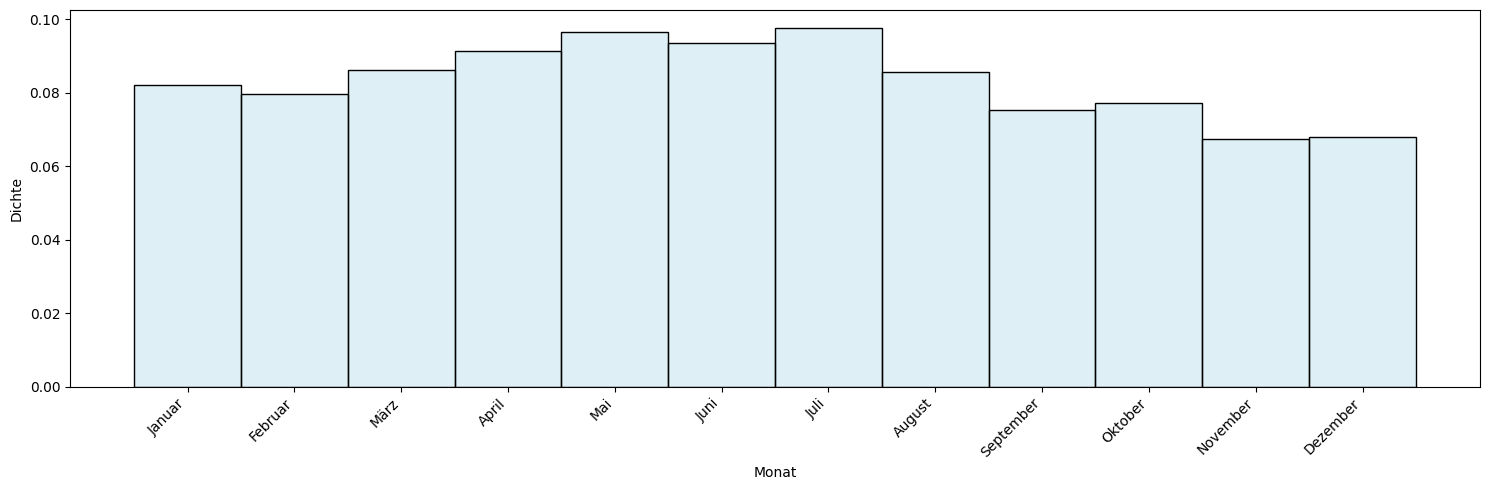

In [36]:
plt.figure(figsize=(15, 5))

sns.histplot(df['CREATED_MONTH'], bins=range(1,14), stat='density', discrete=True, color='lightblue', alpha=0.4)

plt.xlabel('Monat')
plt.ylabel('Dichte')
plt.xticks(range(1,13), [month_names[i] for i in range(1,13)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

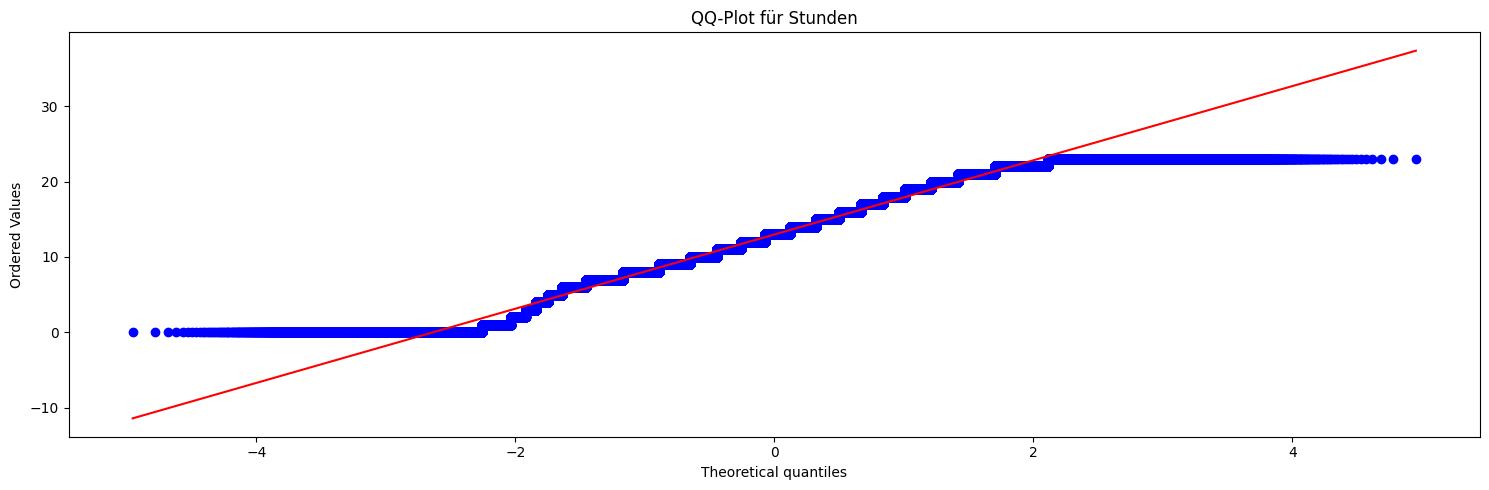

In [40]:
plt.figure(figsize=(15, 5))
stats.probplot(df['CREATED_HOUR'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot für Stunden')
plt.tight_layout()
plt.show()

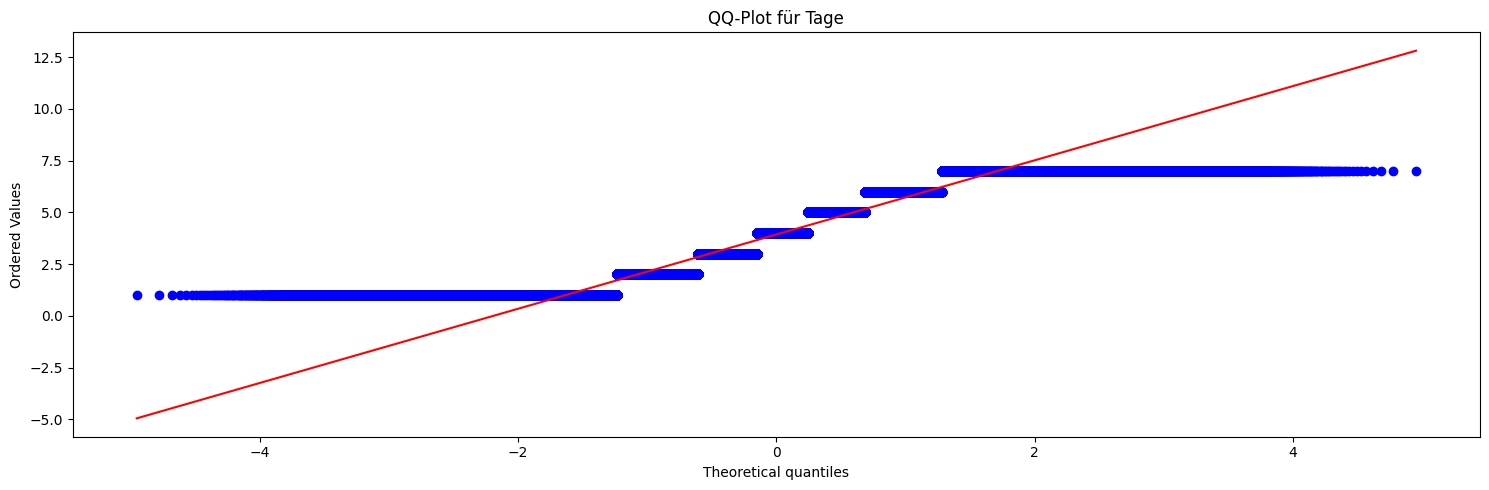

In [44]:
plt.figure(figsize=(15, 5))
stats.probplot(df['CREATED_DAY_OF_WEEK'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot für Tage')
plt.tight_layout()
plt.show()

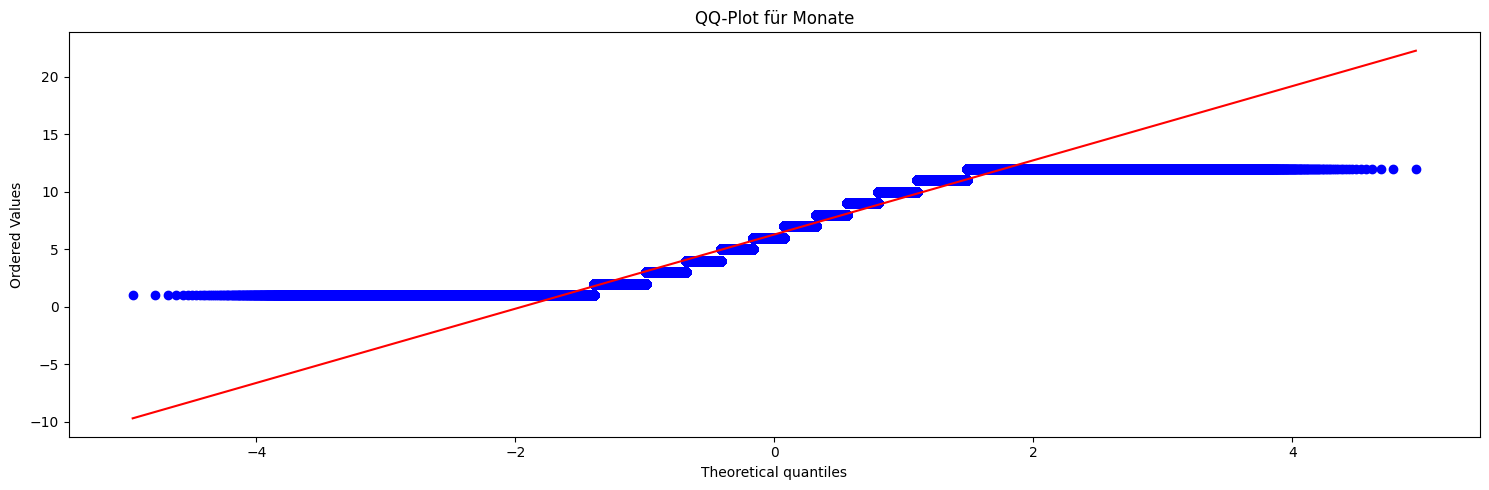

In [ ]:
plt.figure(figsize=(15, 5))
stats.probplot(df['CREATED_MONTH'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot für Monate')
plt.tight_layout()
plt.show()

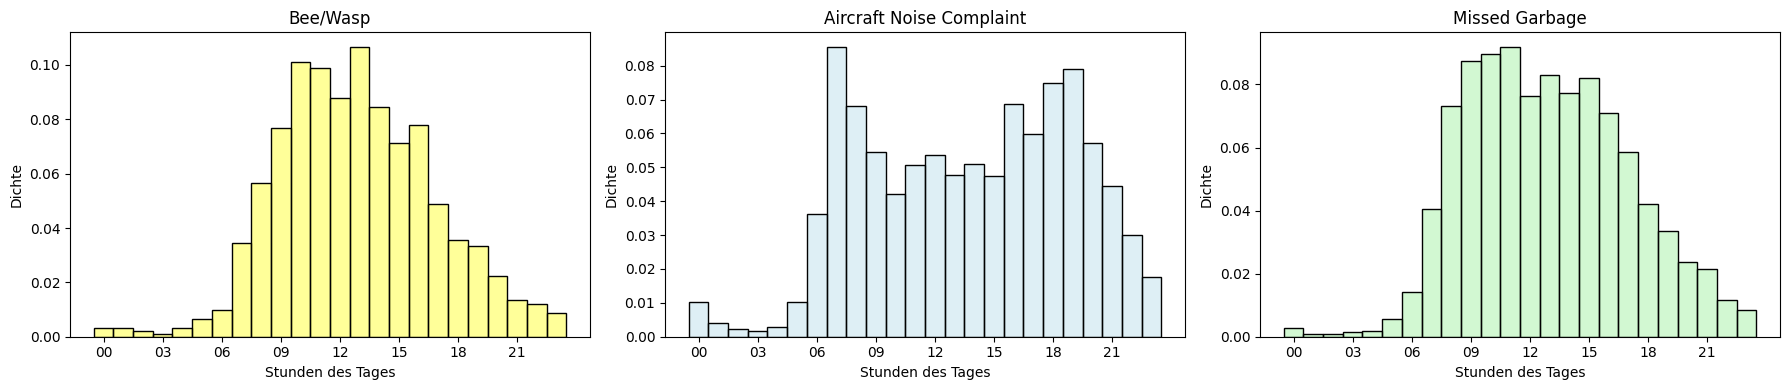

In [10]:
# Diese drei SR_Types werden verglichen
bee_wasp_df = df[df['SR_SHORT_CODE'] == 'SGG'].copy()          
aircraft_df = df[df['SR_SHORT_CODE'] == 'AVN'].copy() 
garbage_df = df[df['SR_SHORT_CODE'] == 'SCC'].copy()  

# Layout der einzelenen Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Bienen
sns.histplot(
    bee_wasp_df['CREATED_HOUR'],
    bins=range(0, 25),
    stat='density',
    discrete=True,
    color='yellow',
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title('Bee/Wasp')
axes[0].set_xlabel('Stunden des Tages')
axes[0].set_ylabel('Dichte')
axes[0].set_xticks(range(0, 24, 3))
axes[0].set_xticklabels([f'{h:02d}' for h in range(0, 24, 3)])

# Flugzeuglärm
sns.histplot(
    aircraft_df['CREATED_HOUR'],
    bins=range(0, 25),
    stat='density',
    discrete=True,
    color='lightblue',
    alpha=0.4,
    ax=axes[1]
)
axes[1].set_title('Aircraft Noise Complaint')
axes[1].set_xlabel('Stunden des Tages')
axes[1].set_ylabel('Dichte')
axes[1].set_xticks(range(0, 24, 3))
axes[1].set_xticklabels([f'{h:02d}' for h in range(0, 24, 3)])

# Müllabholung
sns.histplot(
    garbage_df['CREATED_HOUR'],
    bins=range(0, 25),
    stat='density',
    discrete=True,
    color='lightgreen',
    alpha=0.4,
    ax=axes[2]
)
axes[2].set_title('Missed Garbage')
axes[2].set_xlabel('Stunden des Tages')
axes[2].set_ylabel('Dichte')
axes[2].set_xticks(range(0, 24, 3))
axes[2].set_xticklabels([f'{h:02d}' for h in range(0, 24, 3)])

plt.tight_layout()
plt.show()

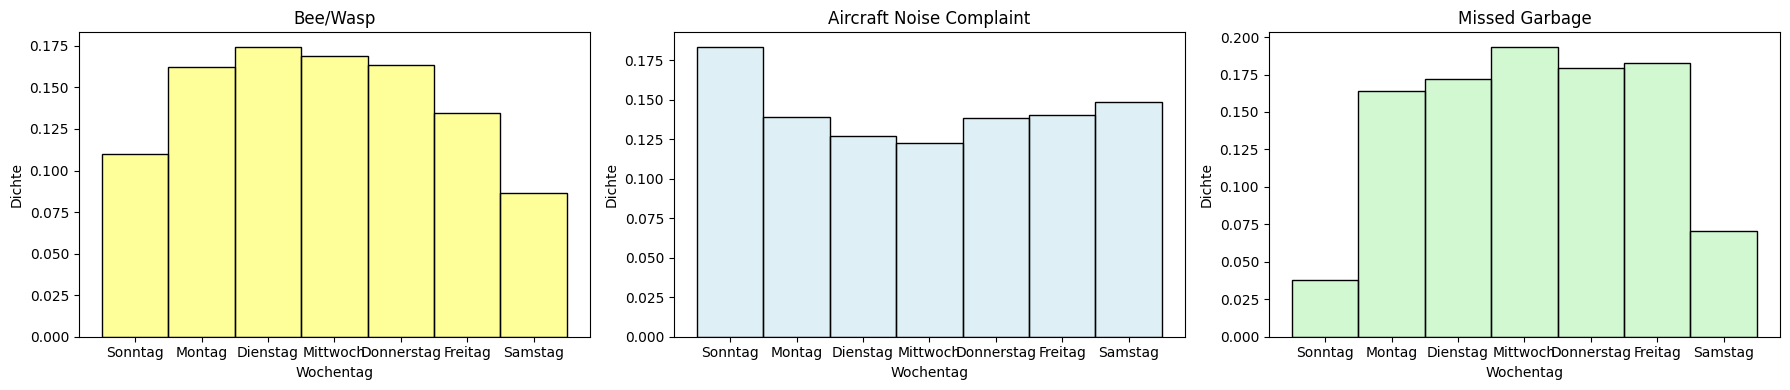

In [9]:
# Layout für die drei Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Bienen 
sns.histplot(
    bee_wasp_df['CREATED_DAY_OF_WEEK'],
    bins=range(1, 9),
    stat='density',
    discrete=True,
    color='yellow',
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title('Bee/Wasp')
axes[0].set_xlabel('Wochentag')
axes[0].set_ylabel('Dichte')
axes[0].set_xticks(weekday_order)
axes[0].set_xticklabels([weekday_names[i] for i in weekday_order])

# AVN
sns.histplot(
    aircraft_df['CREATED_DAY_OF_WEEK'],
    bins=range(1, 9),
    stat='density',
    discrete=True,
    color='lightblue',
    alpha=0.4,
    ax=axes[1]
)
axes[1].set_title('Aircraft Noise Complaint')
axes[1].set_xlabel('Wochentag')
axes[1].set_ylabel('Dichte')
axes[1].set_xticks(weekday_order)
axes[1].set_xticklabels([weekday_names[i] for i in weekday_order])

# Müllabholung
sns.histplot(
    garbage_df['CREATED_DAY_OF_WEEK'],
    bins=range(1, 9),
    stat='density',
    discrete=True,
    color='lightgreen',
    alpha=0.4,
    ax=axes[2]
)
axes[2].set_title('Missed Garbage')
axes[2].set_xlabel('Wochentag')
axes[2].set_ylabel('Dichte')
axes[2].set_xticks(weekday_order)
axes[2].set_xticklabels([weekday_names[i] for i in weekday_order])

plt.tight_layout()
plt.show()


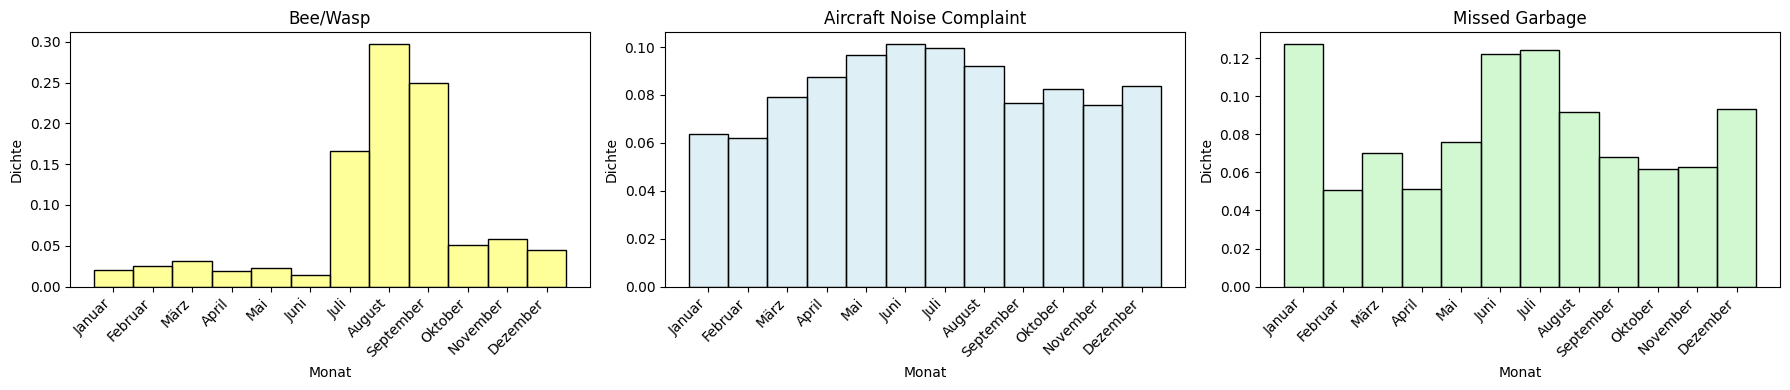

In [8]:
# Layout der Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Ordnung damit Seaborn die Monate in der richtigen Reihenfolge darstellt
month_order = list(range(1, 13))  

# Bienen Beschwerden
sns.histplot(
    bee_wasp_df['CREATED_MONTH'],
    bins=range(1, 14),
    stat='density',
    discrete=True,
    color='yellow',
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title('Bee/Wasp')
axes[0].set_xlabel('Monat')
axes[0].set_ylabel('Dichte')
axes[0].set_xticks(month_order)
axes[0].set_xticklabels([month_names[i] for i in month_order], rotation=45, ha='right')

# Flugzeuglärm Beschwerden
sns.histplot(
    aircraft_df['CREATED_MONTH'],
    bins=range(1, 14),
    stat='density',
    discrete=True,
    color='lightblue',
    alpha=0.4,
    ax=axes[1]
)
axes[1].set_title('Aircraft Noise Complaint')
axes[1].set_xlabel('Monat')
axes[1].set_ylabel('Dichte')
axes[1].set_xticks(month_order)
axes[1].set_xticklabels([month_names[i] for i in month_order], rotation=45, ha='right')

# Müllabfuhr Beschwerden
sns.histplot(
    garbage_df['CREATED_MONTH'],
    bins=range(1, 14),
    stat='density',
    discrete=True,
    color='lightgreen',
    alpha=0.4,
    ax=axes[2]
)
axes[2].set_title('Missed Garbage')
axes[2].set_xlabel('Monat')
axes[2].set_ylabel('Dichte')
axes[2].set_xticks(month_order)
axes[2].set_xticklabels([month_names[i] for i in month_order], rotation=45, ha='right')

plt.tight_layout()
plt.show()
